<a href="https://colab.research.google.com/github/ChetanJadhav2341/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation System**

# **Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our
lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences),
recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some
industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to
create a book recommendation system for users

**Content**

The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books


ooks are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (BookTitle, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.


● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.



# **Loading Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
url_books='/content/drive/MyDrive/Capstone Project-Unsupervised ML (Clustering)-(Book Recommendation System)/Books.csv'
url_ratings='/content/drive/MyDrive/Capstone Project-Unsupervised ML (Clustering)-(Book Recommendation System)/Ratings.csv'
url_users='/content/drive/MyDrive/Capstone Project-Unsupervised ML (Clustering)-(Book Recommendation System)/Users.csv'

In [4]:
df_books=pd.read_csv(url_books)
df_ratings=pd.read_csv(url_ratings)
df_users=pd.read_csv(url_users)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Importing Libraries**

In [5]:

#Importing Libraries
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

**1. Checking Books Data**

In [6]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
df_books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [8]:
df_books.shape

(271360, 8)

In [9]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
df_books.Publisher.fillna('other',inplace=True)

In [11]:
df_books.loc[df_books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [12]:
df_books['Book-Author'].fillna('other',inplace=True)

In [13]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [14]:
df_books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102024
Year-Of-Publication       202
Publisher               16808
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [15]:
df_books.duplicated().sum()

0

In [16]:
df_books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [17]:
# There are no need some columns which will Drop it.
df_books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1, inplace=True)

In [18]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [19]:
df_books['Book-Title'].nunique()

242135

In [20]:

df_books['Year-Of-Publication']=df_books['Year-Of-Publication'].astype('str')
a=list(df_books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)


['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [21]:
df_books.loc[df_books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In above some miss-match entries have been incorrectly loaded which will rearrenge

In [22]:
df_books.loc[df_books.ISBN == '0789466953','Year-Of-Publication'] = 2000
df_books.loc[df_books.ISBN == '0789466953','Book-Author'] = "James Buckley"
df_books.loc[df_books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"


In [23]:
df_books.loc[df_books.ISBN == '078946697X','Year-Of-Publication'] = 2000
df_books.loc[df_books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
df_books.loc[df_books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"


In [24]:
df_books.loc[df_books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [25]:

df_books.loc[df_books.ISBN == '2070426769','Year-Of-Publication'] = 2003
df_books.loc[df_books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df_books.loc[df_books.ISBN == '2070426769','Publisher'] = "Gallimard"
df_books.loc[df_books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


In [26]:
df_books['Year-Of-Publication']=df_books['Year-Of-Publication'].astype('str')
a=list(df_books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050']


In Above data all values in integere

**2. Checking Ratings Dataset**

In [27]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [28]:
df_ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [29]:
df_ratings.shape

(1149780, 3)

In [30]:
df_ratings.duplicated().sum()

0

In [31]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [32]:
df_ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [33]:
df_ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

Ratings dataset should have books only which exist in our books dataset

In [34]:
df_ratings_new = df_ratings[df_ratings.ISBN.isin(df_books.ISBN)]
df_ratings.shape,df_ratings_new.shape

((1149780, 3), (1031136, 3))

It can be seen that many rows having df_book ISBN not part of df_books dataset got dropped off
df_ratings dataset should have df_ratings from df_users which exist in df_users dataset.

In [35]:
df_ratings_new = df_ratings_new[df_ratings_new['User-ID'].isin(df_users['User-ID'])]

It can be seen that no new user was there in ratings dataset.


Let's see how the ratings are distributed

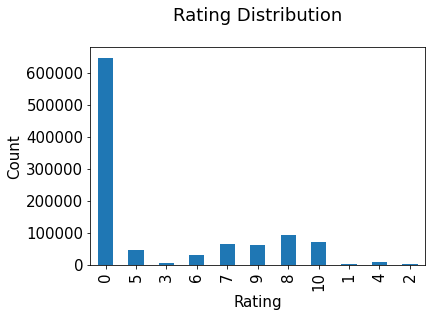

In [36]:
plt.rc("font", size=15)
df_ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [37]:

#Hence segragating implicit and explict ratings datasets
df_ratings_explicit = df_ratings_new[df_ratings_new['Book-Rating'] != 0]
df_ratings_implicit = df_ratings_new[df_ratings_new['Book-Rating'] == 0]


In [38]:
df_rating_count = pd.DataFrame(df_ratings_explicit.groupby('ISBN')['Book-Rating'].count())
df_rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


The book with ISBN '0316666343' received the most rating counts. Let’s find out what book it is, and what books are in the top 5.


In [39]:

most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, df_books, on='ISBN')
most_rated_books_summary


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


The book that received the most rating counts in this data set is Rich Shapero’s “Wild Animus”. And there is something in common among these five books that received
the most rating counts — they are all novels. So it is conclusive that novels are popular and likely receive more ratings.

In [40]:

# Create column Rating average 
df_ratings_explicit['Avg_Rating']=df_ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
df_ratings_explicit['Total_No_Of_Users_Rated']=df_ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')


In [41]:
df_ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


**3. Checking Users Dataset**

In [42]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [43]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [44]:
#percentage of missing values
round(df_users.isnull().mean().mul(100),2)


User-ID      0.00
Location     0.00
Age         39.72
dtype: float64

In the users dataset there are 110762 missing values found in the Age column which is 39.72% of the total value.

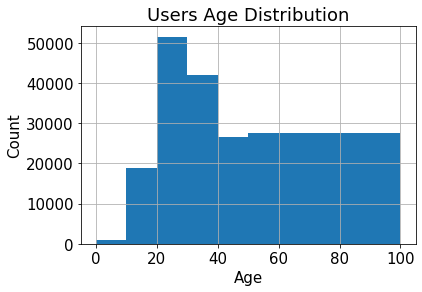

In [45]:

# histogram plot for users age distribution
df_users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Users Age Distribution')
plt.show()

he most active book readers are in the age group of 20-33.

Text(0.5, 1.0, 'Outlier data in Age column')

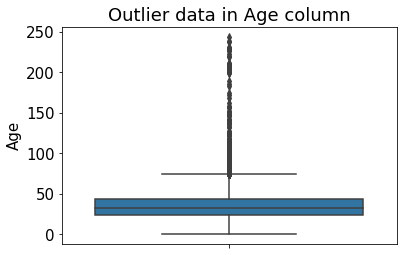

In [46]:

# checking outliers through boxplot
sns.boxplot(y='Age', data=df_users)
plt.title('Outlier data in Age column')

From the above boxplot we can observe that outliers are present in the Age column in the "Users" dataset.

In [47]:

# Checking the unique value of users age
print(sorted(df_users.Age.unique()))


[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [48]:
 # unique value in Location columns
 df_users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [49]:
#Creating column Country

for i in df_users:
 df_users['Country']=df_users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')
print(df_users.Country.nunique())


529


In [50]:
#drop location column
df_users.drop('Location',axis=1,inplace=True)

In [51]:
df_users.sample(5)

,User-ID,Age,Country
117247,117248,NaN,germany
232546,232547,NaN,usa
221121,221122,NaN,sweden
115122,115123,35.0,usa
203249,203250,33.0,united kingdom


In [52]:

#checking for missing values
df_users.isnull().sum()


User-ID         0
Age        110762
Country       368
dtype: int64

In [53]:
#changing datatype
df_users['Country']=df_users['Country'].astype('str')

In [54]:

a=list(df_users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

Some data has Misspellings Let's correct it.

In [55]:
df_users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

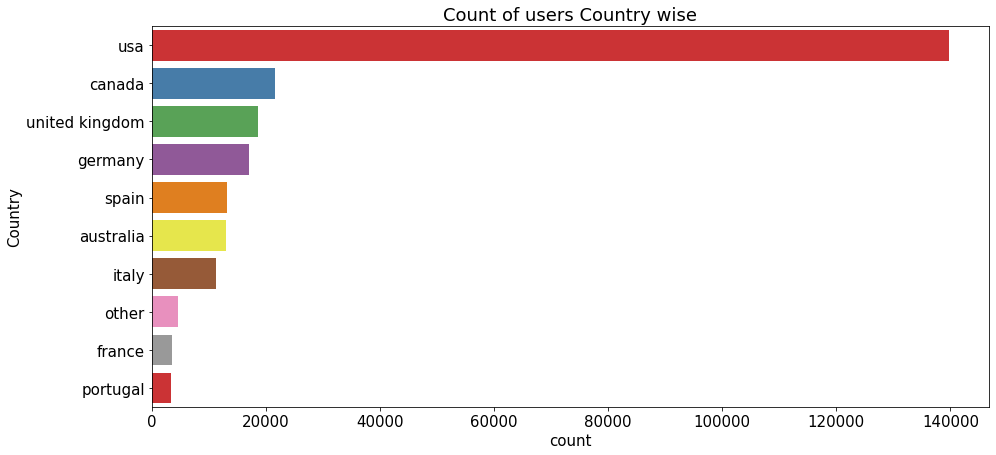

In [56]:

plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=df_users,order=pd.value_counts(df_users['Country']).iloc[:10].index, palette='Set1')
plt.title('Count of users Country wise')

Most number of users are from USA
Let's treat outliers in users age

Text(0.5, 1.0, 'Age Distribution Plot')

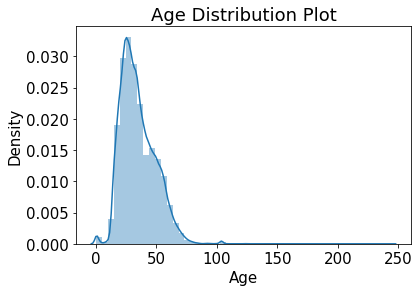

In [57]:

sns.distplot(df_users.Age)
plt.title('Age Distribution Plot')

Age value's below 5 and above 100 do not make much sense for our book rating case...hence replacing these by NaN.

In [58]:

# outlier data became NaN
df_users.loc[(df_users.Age > 100) | (df_users.Age < 5), 'Age'] = np.nan

In [59]:

df_users.isna().sum()


User-ID         0
Age        112010
Country         0
dtype: int64

Age has positive Skewness (right tail) so we can use median to fill Nan values, but for this we don't like to fill Nan value just for one range of age. To handle this we'll use
country column to fill Nan.

In [60]:
df_users['Age'] = df_users['Age'].fillna(df_users.groupby('Country')['Age'].transform('median'))


In [61]:
df_users.isna().sum()


User-ID      0
Age        276
Country      0
dtype: int64

Still we have 276 Nan values let's fill them with mean


In [62]:
df_users['Age'].fillna(df_users.Age.mean(),inplace=True)

In [63]:
df_users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

# **Merging All Dataset.**

In [64]:

Final_Dataset=df_users.copy()
Final_Dataset=pd.merge(Final_Dataset,df_ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,df_books,on='ISBN')


In [65]:
Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,11676,28.0,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,67544,30.0,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,116866,32.0,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,123629,33.0,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [66]:

def missing_values(df):
 mis_val=df.isnull().sum()
 mis_val_percent=round(df.isnull().mean().mul(100),2)
 mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
 mz_table=mz_table.rename(
 columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
 mz_table['Data_type']=df.dtypes
 mz_table=mz_table.sort_values('% of Total Values',ascending=False)
 return mz_table.reset_index()

In [67]:
Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,11676,28.0,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,67544,30.0,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,116866,32.0,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,123629,33.0,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [68]:
Final_Dataset.shape

(383842, 11)

# **Popularity Based Filtering.**


As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book
which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.
Book weighted avg formula:
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]
where,
v is the number of votes for the books;
m is the minimum votes required to be listed in the chart;
R is the average rating of the book; and
C is the mean vote across the whole report.
Now we find the values of v,m,R,C.

In [69]:
C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569505161 , m=64.0


(38570, 11)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.
We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function,
weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:

In [70]:

def weighted_rating(x, m=m, C=C):
 v = x['Total_No_Of_Users_Rated']
 R = x['Avg_Rating']
 return (v/(v+m) * R) + (m/(m+v) * C)
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [71]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)
#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.700403
3,To Kill a Mockingbird,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.484783


# **Model Based Collaborative Filtering Recommender**

The goal of the recommender system is to predict user preference for a set of items based on the past experience. Two the most popular approaches are Content-Based
and Collaborative Filtering.
Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar
users. There are two categories of collaborative filtering algorithms: memory based and model based.
Model based approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high
dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.
The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.


## **Import Library**

In [72]:
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

This analysis will focus on book recommendations based on Book-Crossing dataset. To reduce the dimensionality of the dataset and avoid running into memory error we
will focus on users with at least 3 ratings and top 10% most frequently rated books.


The recommender systems will be built using surprise package (Matrix Factorization - based models).


In [73]:
df_ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [74]:
user_ratings_threshold = 3
filter_users = df_ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()
df_ratings_top = df_ratings_explicit[df_ratings_explicit['user_id'].isin(filter_users_list)]
print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327271


In [75]:
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc
filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]
print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 160787


SVD and NMF models comparison
Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise
package provides implementation of those algorithms.

In [76]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 8.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633963 sha256=d8cd49eb40e81488bddb3269012fc9e879c5289f483ddece06b2dc2669ef5fa4
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [77]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [78]:
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [79]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse     1.599888
test_mae      1.238356
fit_time     12.398539
test_time     1.014599
dtype: float64

In [80]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse     2.621756
test_mae      2.239701
fit_time     16.504861
test_time     0.859730
dtype: float64

It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.


## **Optimisation of SVD algorithm**

Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding
the best configuration of parameters.


It is used to find the best setting of parameters:
n_factors - the number of factors
n_epochs - the number of iteration of the SGD procedure
lr_all - the learning rate for all parameters
reg_all - the regularization term for all parameters
As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [81]:
param_grid = {'n_factors': [80,100],
 'n_epochs': [5, 20],
 'lr_all': [0.002, 0.005],
 'reg_all': [0.2, 0.4]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.593189580624012
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


## **Analysis of Collaborative Filtering model results**


In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.


In [82]:
trainset, testset = train_test_split(data, test_size=0.2)
model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [83]:

df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)


,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
1031,100906,0671680110,6.0,8.459179,False,8.0,2.459179
26136,112109,0449205967,7.0,7.893177,False,8.0,0.893177
3888,128119,0312243022,10.0,7.899918,False,8.0,2.100082
17713,11676,0312278586,6.0,7.583484,False,8.0,1.583484
18409,196077,067945960X,4.0,7.479407,False,7.0,3.479407


Distribution of actual and predicted ratings in the test set According to the distribution of actual ratings of books in the test set, the biggest part of users give positive
scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable. The distribution of predicted ratings in the test set is visibly different. One
more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.



It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

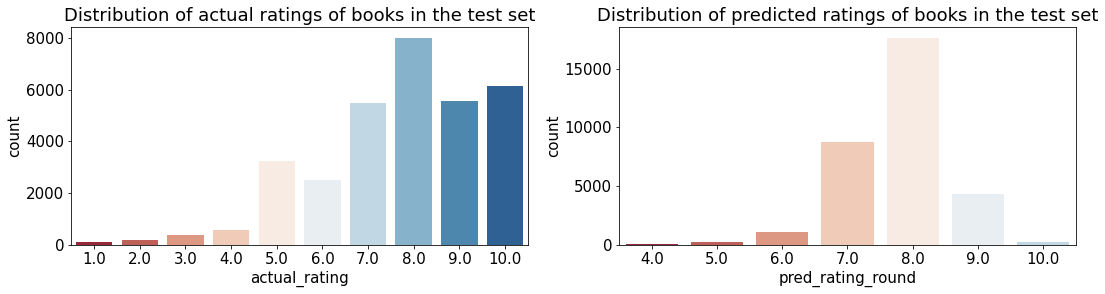

In [84]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')
sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')
plt.show()

**Absolute error of predicted ratings**


The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several
observations for which the absolute error was close to 10.



How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent
value). The further the rating from score = 8, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably
the model is predicting high ratings for those observations.


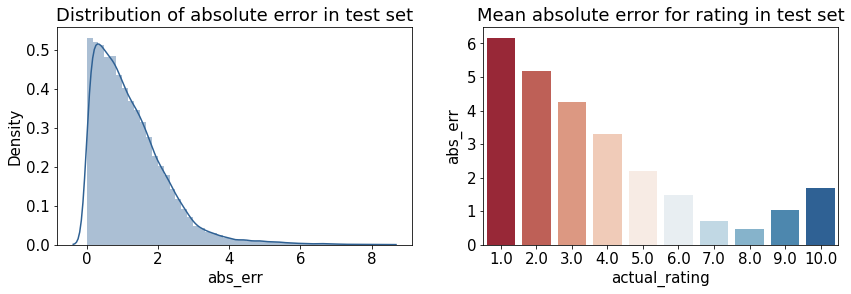

In [85]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')
sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')
plt.show()

Analysis of predicted ratings of a particular user


For this part of the analysis, the user with id 193458 was selected. By analyzing book ratings by this user, it can be noted that he/she likes diverse types of readings:
English romantic novels (Pride and Prejudice, Sense and Sensibility), fantasy (Narnia) as well as historical novels (Schindler's List). Among the recommended books there
are other works from Narnia's series, two historical novels and one romance which correlates with user's previous preferences.


In [86]:
df_books =df_books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

**Train set: Top rated books**




In [87]:
selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]
df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(10)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113628,193458,1853260002,10,8.217391,23,Pride &amp; Prejudice (Wordsworth Classics),NaN
113593,193458,0345342569,9,7.947368,19,Shoeless Joe,NaN
113585,193458,0140620125,9,8.133333,15,Wuthering Heights (Penguin Popular Classics),NaN
113578,193458,0064471063,9,8.518519,27,The Horse and His Boy,NaN
113582,193458,0064471101,9,8.729730,37,The Magician's Nephew (rack) (Narnia),NaN
113619,193458,0671880314,9,8.305556,36,Schindler's List,NaN
113599,193458,0345431057,9,9.125000,8,Slaves in the Family (Ballantine Reader's Circle),NaN
113580,193458,006447108X,9,8.833333,18,The Last Battle,NaN
113620,193458,0679429220,9,7.794393,107,Midnight in the Garden of Good and Evil: A Sav...,NaN
113583,193458,014011369X,9,9.125000,8,"And the Band Played on: Politics, People, and ...",NaN


**Test set: predicted top rated books**

In [88]:
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113594,193458,0345361792,10,8.607735,181,A Prayer for Owen Meany,8.442427
113576,193458,0064471047,9,8.714286,42,"The Lion, the Witch, and the Wardrobe (The Chr...",8.341085
113587,193458,0142001740,9,8.452769,307,The Secret Life of Bees,8.301177
113611,193458,0451169530,8,8.485714,70,The Stand: Complete and Uncut,8.146063
113630,193458,1853260169,10,8.153846,13,Sense and Sensibility (Wordsworth Classics),7.990869


**Test set: actual top rated books**

In [89]:
df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113594,193458,0345361792,10,8.607735,181,A Prayer for Owen Meany,8.442427
113630,193458,1853260169,10,8.153846,13,Sense and Sensibility (Wordsworth Classics),7.990869
113576,193458,0064471047,9,8.714286,42,"The Lion, the Witch, and the Wardrobe (The Chr...",8.341085
113577,193458,0064471055,9,8.545455,22,Prince Caspian (rack) : The Return to Narnia (...,7.978483
113584,193458,0140298479,9,7.539823,113,Bridget Jones: The Edge of Reason,7.442256


# **Collaborative Filtering based Recommendation System--(Item-Item Based)**

In [90]:

from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [91]:
df_ratings_top.head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
59,276772,0553572369,7,6.625000,8
61,276772,3499230933,10,7.166667,6


In [92]:
df_ratings_top.rename(columns={'user_id':'userID' ,'isbn':'ISBN','book_rating':'bookRating'},inplace=True)

In [93]:
df_ratings_top.head()

,userID,ISBN,bookRating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
59,276772,0553572369,7,6.625000,8
61,276772,3499230933,10,7.166667,6


# **Implementing KNN**

In [94]:

#Generating ratings matrix from explicit ratings table
ratings_matrix = df_ratings_top.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()
#Notice that most of the values are NaN (undefined) implying absence of ratings

(18549, 13740)


ISBN,0002005018,0002251760,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,000649840X,0006511767,...,9500723832,950491036X,9505156642,9505156944,9580464162,958704049X,9681500555,9722016563,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:

n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

18549 13740


In [96]:
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [97]:
#checking first few rows
ratings_matrix.head(5)

ISBN,0002005018,0002251760,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,000649840X,0006511767,...,9500723832,950491036X,9505156642,9505156944,9580464162,958704049X,9681500555,9722016563,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
sparsity = 1.0-len(df_ratings_explicit)/float(df_ratings_explicit.shape[0]*n_books)
print ('The sparsity level of Book Crossing dataset is ' + str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99272197962155 %


In [101]:
combine_book_rating = pd.merge(df_ratings, df_books, on ='ISBN')
columns = ['Book-Author','Year-Of-Publication', 'Publisher']

KeyError: ignored

In [ ]:
combine_book_rating = combine_book_rating.drop(columns, axis = 1)
combine_book_rating.rename(columns={'User-ID':'userID','Book-Title':'bookTitle','Book-Rating':'bookRating'},inplace=True)
combine_book_rating.head()